In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [57]:
df = pd.read_csv("GBvideos.csv")

In [58]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [59]:
df.head()

video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...  
2  Eminem's new track Walk on Water ft. Beyoncé i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [61]:
df[df["description"].apply(lambda x: pd.isna(x))]

video_id trending_date  \
91     _wM_jY_rass      17.14.11   
118    8HON4AswPVk      17.14.11   
187    j5AILysDDTI      17.14.11   
309    _wM_jY_rass      17.15.11   
336    8HON4AswPVk      17.15.11   
...            ...           ...   
38511  H08xgoXkpa8      18.12.06   
38560  vjSohj-Iclc      18.12.06   
38639  JXZG_Qcm6Nw      18.13.06   
38735  vjSohj-Iclc      18.13.06   
38815  JXZG_Qcm6Nw      18.14.06   

                                                   title   channel_title  \
91                                     Bone on Labour HQ   Ross Kempsell   
118                              Arvo Pärt - Tabula Rasa       JSaxofone   
187                               Brad Bufanda Demo Reel     EinsteinEnt   
309                                    Bone on Labour HQ   Ross Kempsell   
336                              Arvo Pärt - Tabula Rasa       JSaxofone   
...                                                  ...             ...   
38511  Snoop Dogg Weighs In On Kanye's Controversial ...        The View   
38560                           Getting some air, Atlas?  BostonDynamics   
38639  Sheldon makes a friend and invites him for din...    kunal gawade   
38735                           Getting some air, Atlas?  BostonDynamics   
38815  Sheldon makes a friend and invites him for din...    kunal gawade   

       category_id              publish_time  \
91              25  2017-11-06T16:12:58.000Z   
118             10  2012-09-13T12:35:46.000Z   
187             24  2010-09-02T20:48:37.000Z   
309             25  2017-11-06T16:12:58.000Z   
336             10  2012-09-13T12:35:46.000Z   
...            ...                       ...   
38511           24  2018-05-24T15:49:26.000Z   
38560           28  2018-05-10T19:56:28.000Z   
38639           10  2018-06-06T06:34:07.000Z   
38735           28  2018-05-10T19:56:28.000Z   
38815           10  2018-06-06T06:34:07.000Z   

                                                    tags    views  likes  \
91                                                [none]   159065   1160   
118    Arvo|"Pärt"|"Tabula"|"Rasa"|"part"|"violin"|"c...   728177   4007   
187                            Brad Bufanda (Film Actor)   154054     16   
309                                               [none]   160381   1168   
336    Arvo|"Pärt"|"Tabula"|"Rasa"|"part"|"violin"|"c...   729358   4016   
...                                                  ...      ...    ...   
38511  Snoop Dogg|"Kanye West"|"slavery"|"race"|"love...   939527  10918   
38560  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6781236  86991   
38639  #Youngsheldon|"#youngsheldon"|"#sheldon"|"#jim...   368022   2303   
38735  Dynamic robots|"Boston Dynamics"|"humanoid rob...  6791996  87079   
38815  #Youngsheldon|"#youngsheldon"|"#sheldon"|"#jim...   382665   2366   

       dislikes  comment_count  \
91         1164              0   
118          71            240   
187          10             19   
309        1170              0   
336          71            240   
...         ...            ...   
38511      1666           2959   
38560      3143          13586   
38639       109            222   
38735      3145          13591   
38815       109            225   

                                       thumbnail_link  comments_disabled  \
91     https://i.ytimg.com/vi/_wM_jY_rass/default.jpg               True   
118    https://i.ytimg.com/vi/8HON4AswPVk/default.jpg              False   
187    https://i.ytimg.com/vi/j5AILysDDTI/default.jpg              False   
309    https://i.ytimg.com/vi/_wM_jY_rass/default.jpg               True   
336    https://i.ytimg.com/vi/8HON4AswPVk/default.jpg              False   
...                                               ...                ...   
38511  https://i.ytimg.com/vi/H08xgoXkpa8/default.jpg              False   
38560  https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg              False   
38639  https://i.ytimg.com/vi/JXZG_Qcm6Nw/default.jpg              False   
38735

In [62]:
df["description"] = df["description"].fillna(value="")

In [63]:
df['description'].size

38916

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


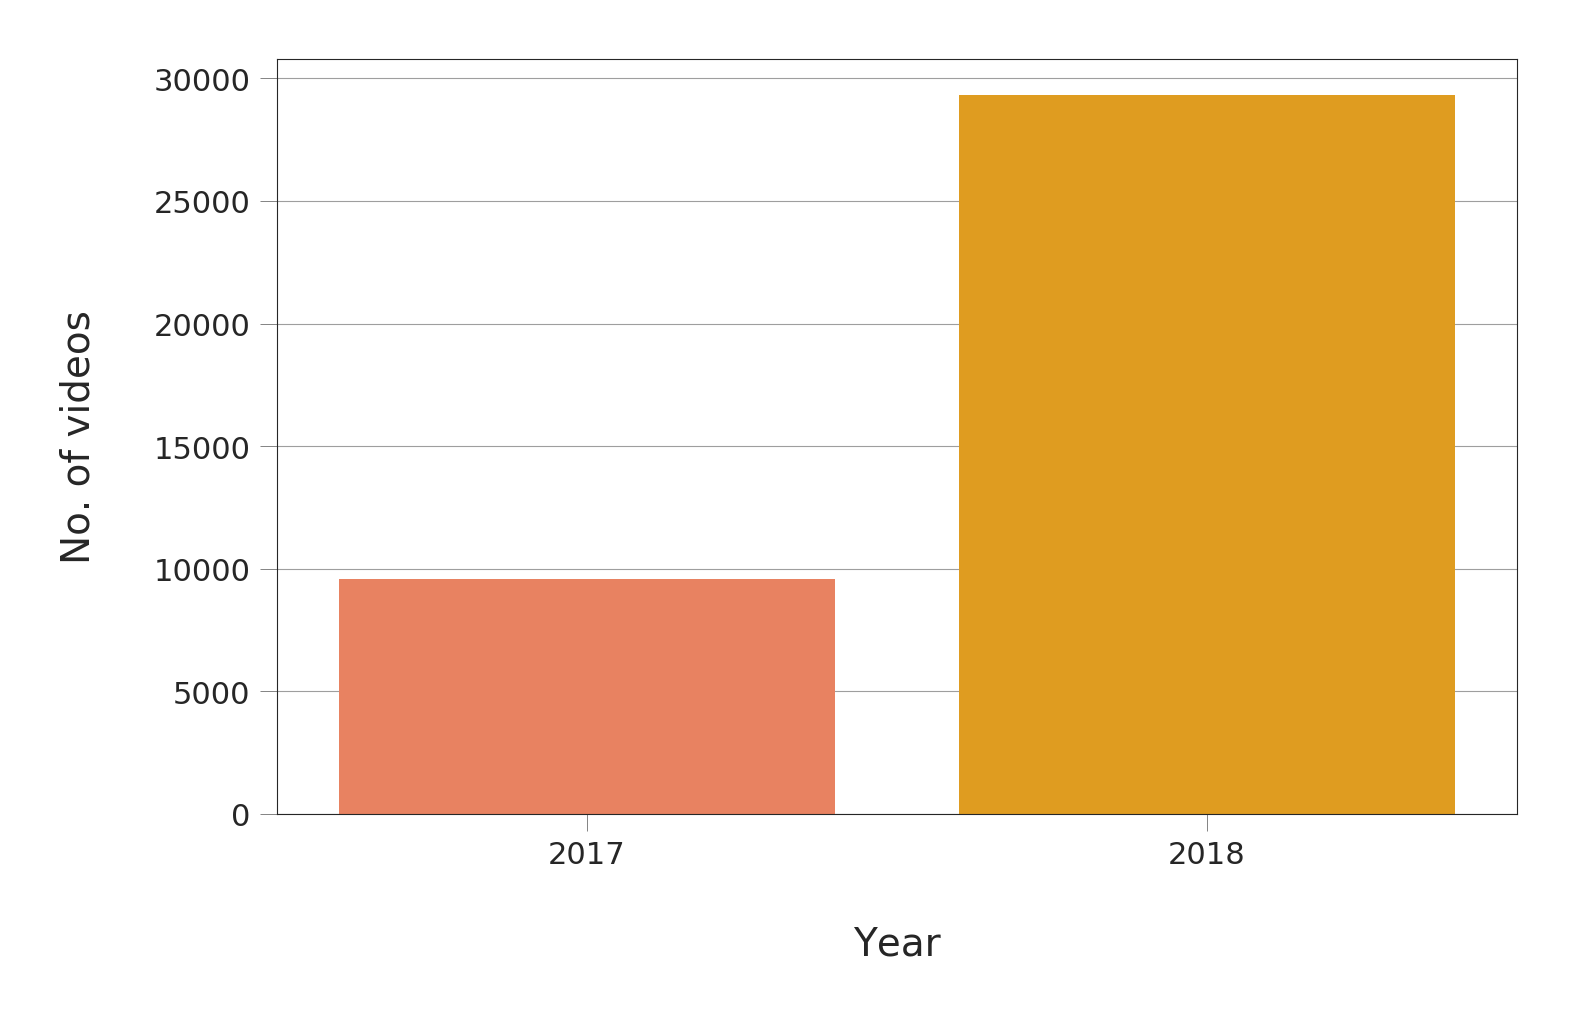

In [65]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [66]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.75
2017   0.25
Name: trending_date, dtype: float64

In [67]:
df.describe()

category_id        views      likes   dislikes  comment_count
count     38916.00     38916.00   38916.00   38916.00       38916.00
mean         16.83   5911943.63  134519.55    7612.56       13088.35
std           7.75  19001209.95  349989.31   50956.83       50667.40
min           1.00       851.00       0.00       0.00           0.00
25%          10.00    251527.25    5897.00     200.00         679.00
50%          20.00    981889.00   25182.50     821.00        2478.00
75%          24.00   3683628.50  114089.25    3357.50        9241.50
max          43.00 424538912.00 5613827.00 1944971.00     1626501.00

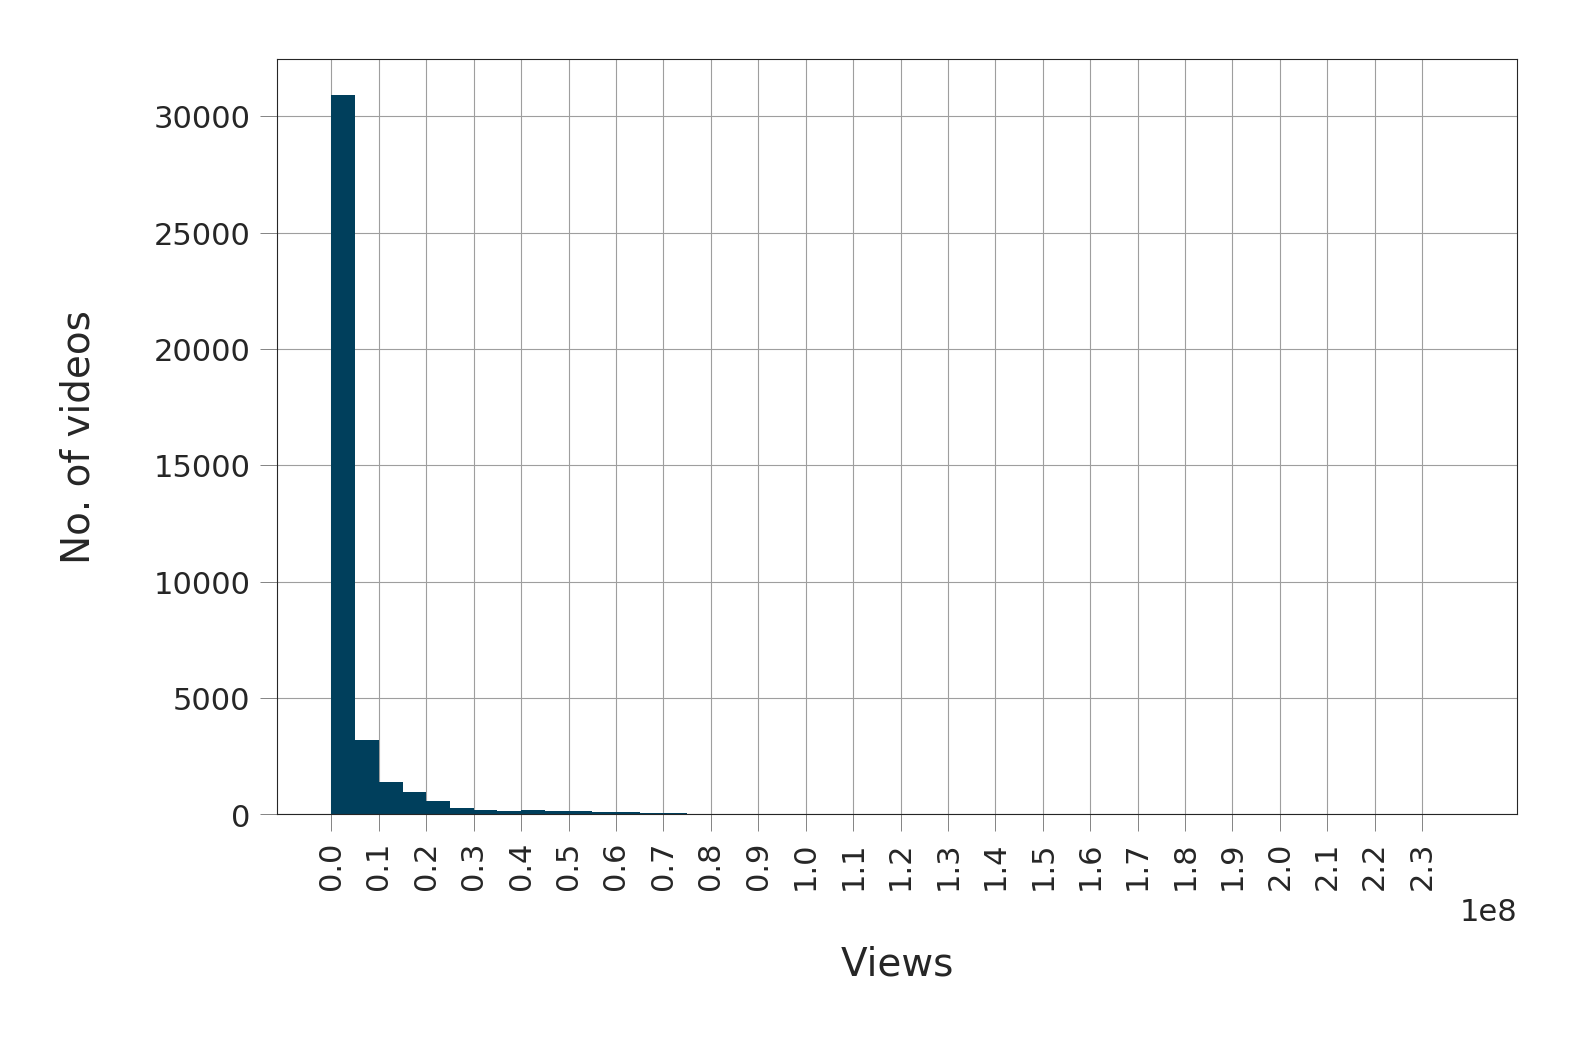

In [68]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

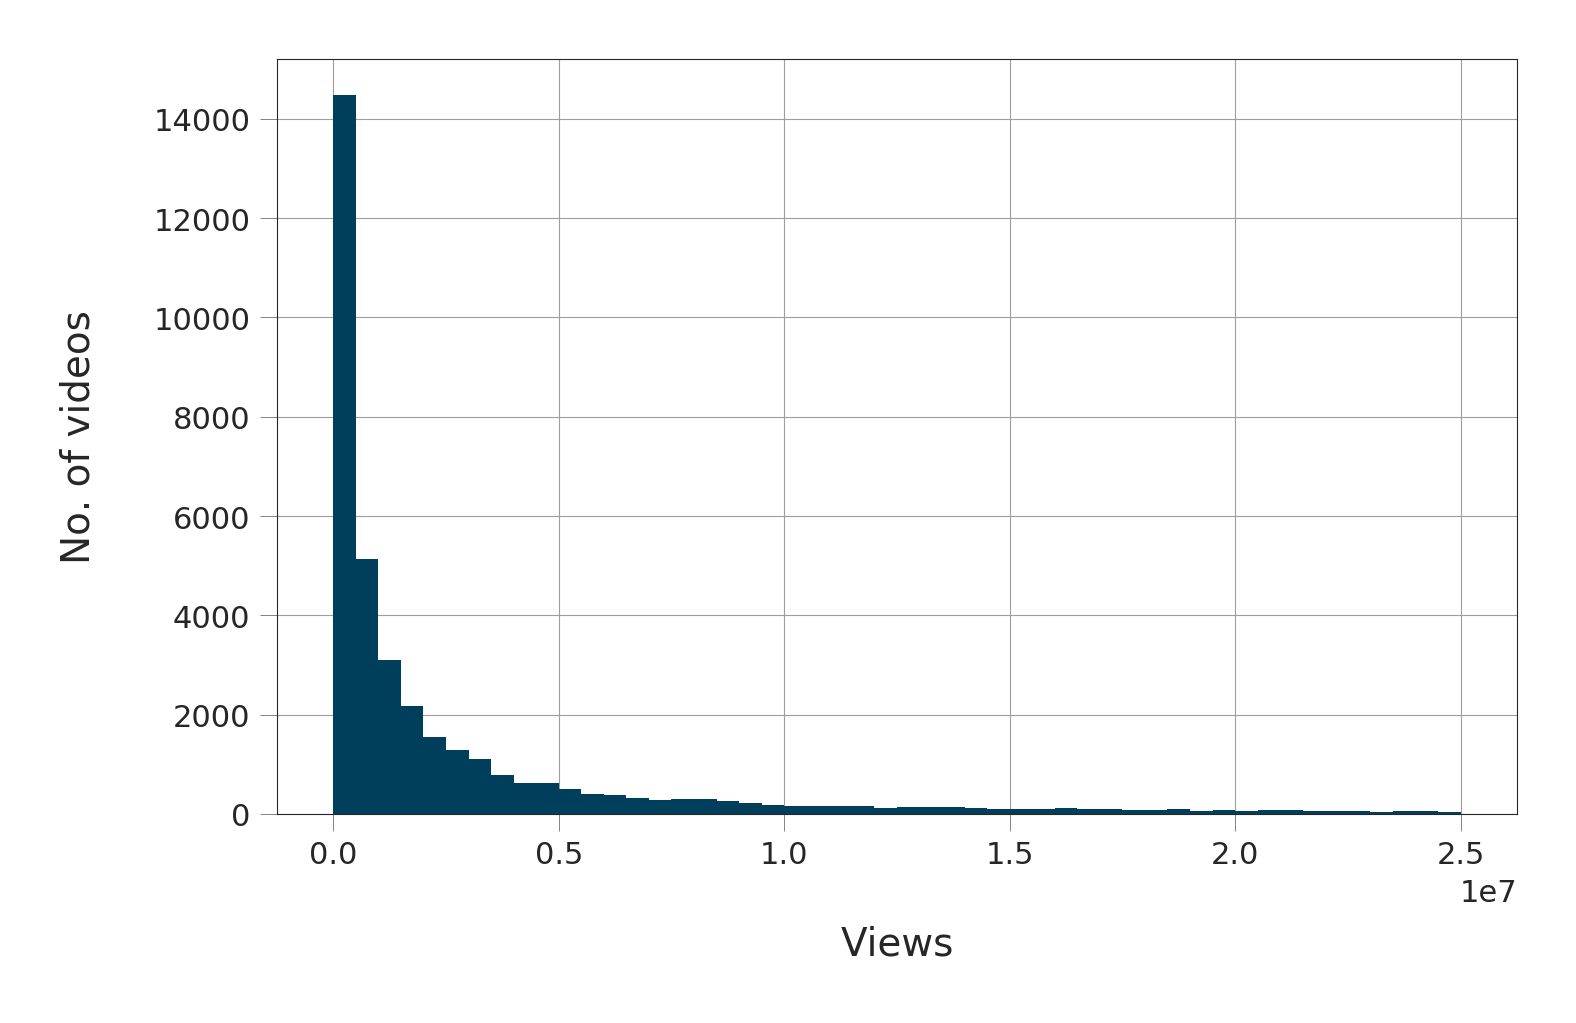

In [69]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [70]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

50.36488847774694

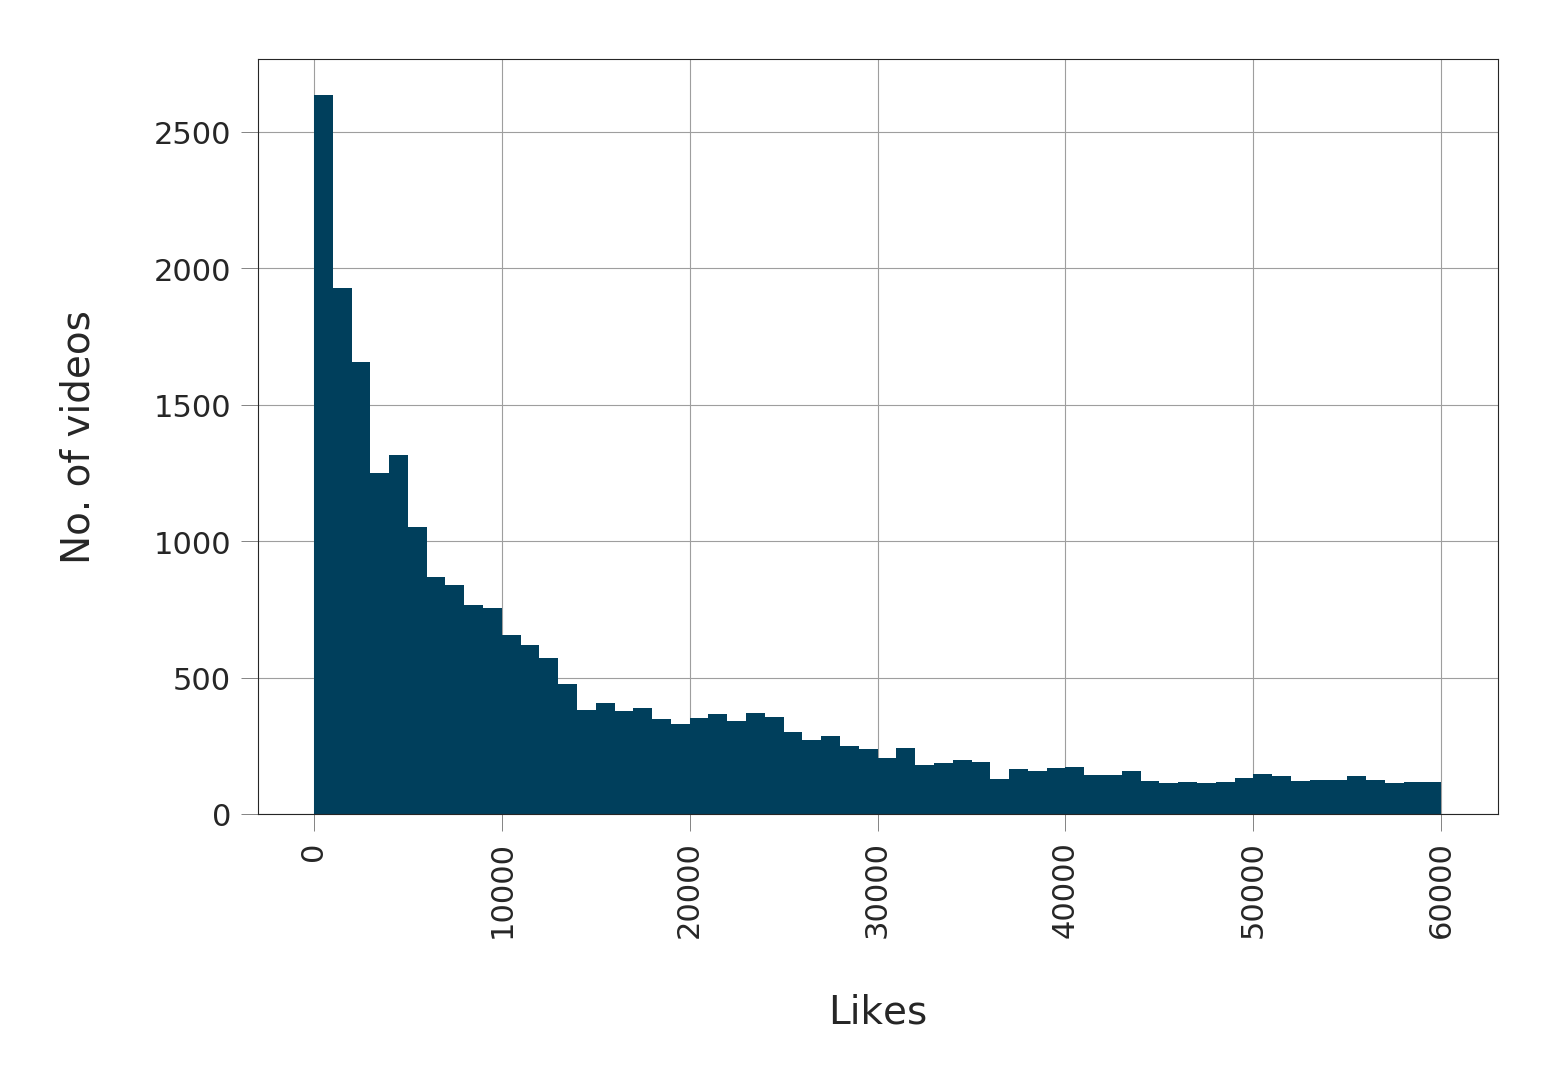

In [71]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e4, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

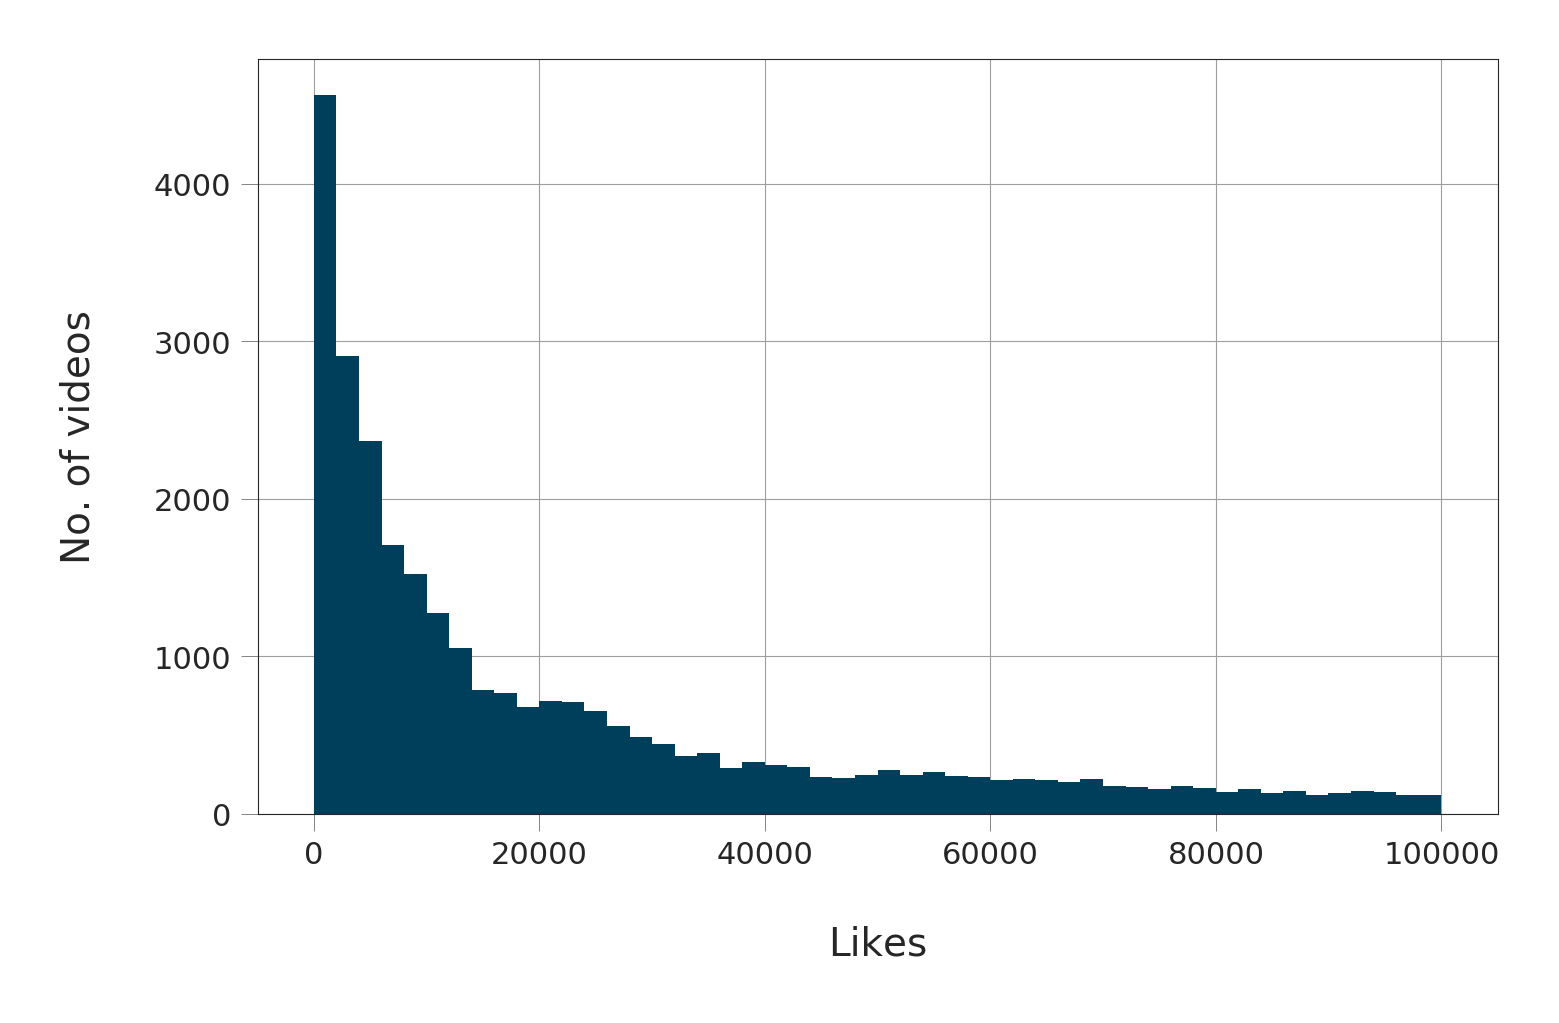

In [72]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [73]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

73.14986123959298

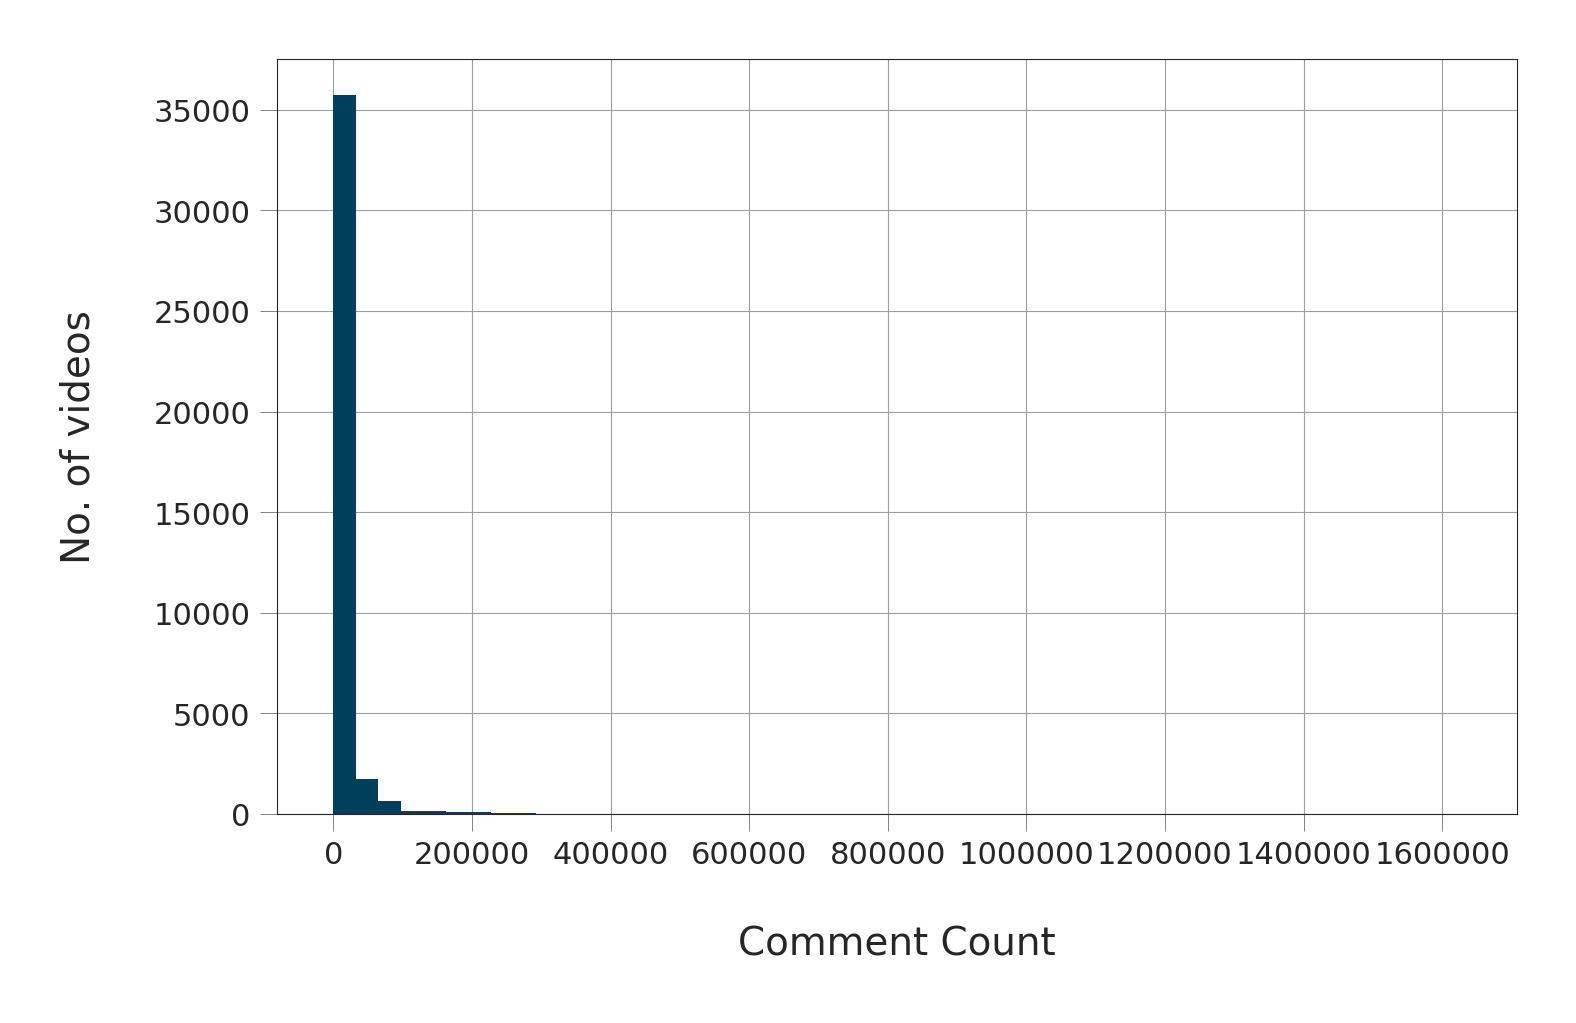

In [74]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

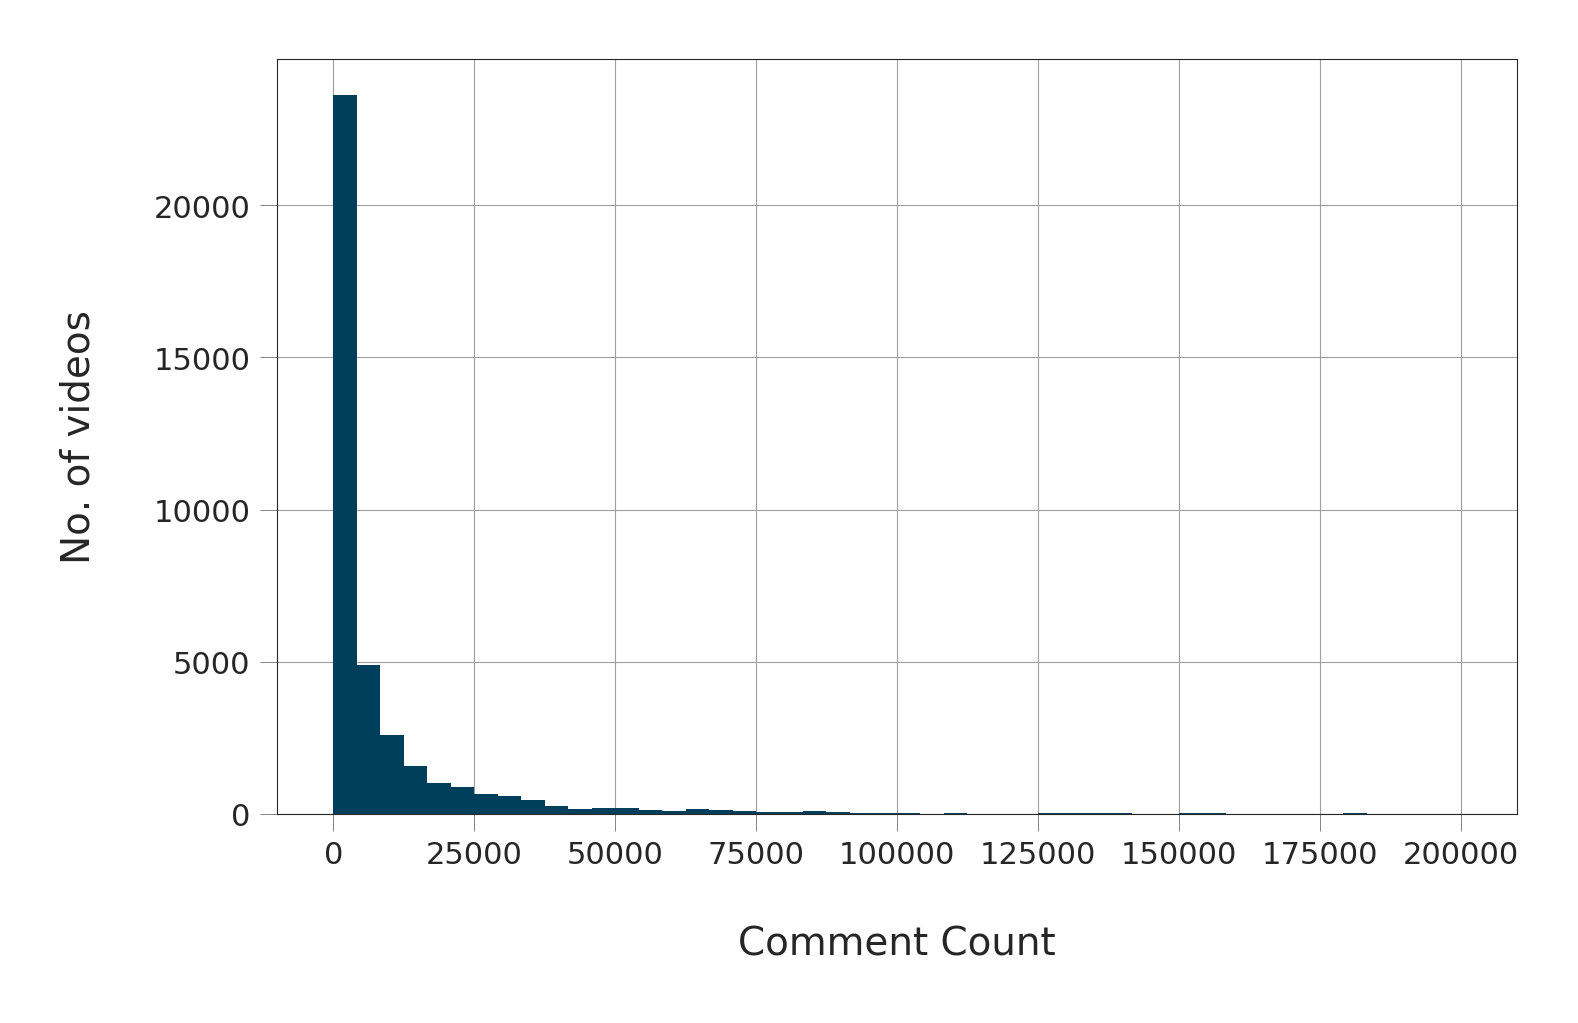

In [75]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [76]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

59.7928872443211

In [77]:
df.describe(include = ['O'])

video_id trending_date            title  \
count         38916         38916            38916   
unique         3272           205             3369   
top     NooW_RbfdWI      17.25.11  Maroon 5 - Wait   
freq             38           200               40   

                                 channel_title              publish_time  \
count                                    38916                     38916   
unique                                    1625                      3250   
top     The Tonight Show Starring Jimmy Fallon  2018-03-09T05:00:03.000Z   
freq                                       208                        55   

          tags                                  thumbnail_link description  
count    38916                                           38916       38916  
unique    3122                                            3272        3705  
top     [none]  https://i.ytimg.com/vi/NooW_RbfdWI/default.jpg              
freq      2010                                              38         612